# Calorimeter regression task

In this project you will be looking at image like data from particle hits in a calorimeter. The goal of the project is to predict the location of the particle in the sky, using the data recorded by the calorimeter.

First download the data, and then un-zip the data with `tar -zxvf dampe.tar.gz` into a data folder.
* You may need to edit the `get_input_data` function in `utils.py` to have the right path.


## The training data
Here you get calorimeter images, as well as some additional information about the calorimeter.
The calorimeter data has the total energy of the corresponding image in the first column, and the calorimeter energy of the maximum bar.

## The target data
The target here is a vector of length four, where the first two columns are the x coordinates at the bottom and top, and then the y positions at the top and the bottom. To simplify the task, you can try predicting each layer individually, before attempting both layers together.
Top and bottom is relative to the tracker in the detector at -40mm and -200mm in z.


In [1]:
from utils import get_input_data
calorimeter_images, calorimeter_data, data_target = get_input_data()

In [2]:
print(f"Input images of shape: {calorimeter_images.shape}")
print(f"Input data of shape: {calorimeter_data.shape}")
print(f"Target data of shape: {data_target.shape}")

Input images of shape: (141946, 14, 22, 1)
Input data of shape: (141946, 2)
Target data of shape: (141946, 4)


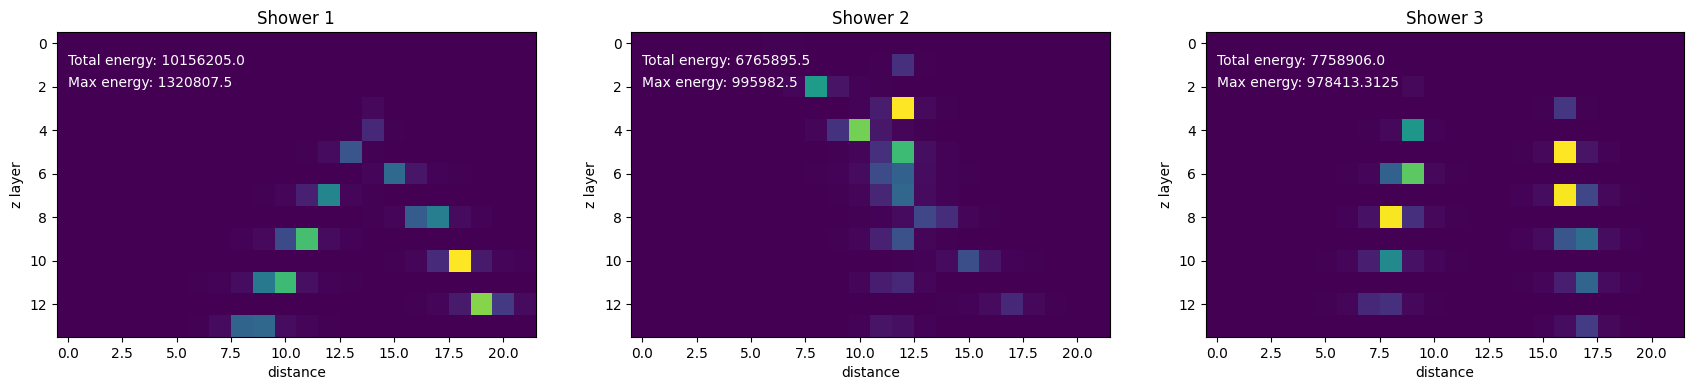

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(21,6))
for i,ax in enumerate(axes):
    ax.imshow(calorimeter_images[i])
    ax.set_title(f"Shower {i+1}")
    ax.set_ylabel("z layer")
    ax.set_xlabel("distance")
    ax.annotate(f"Total energy: {calorimeter_data[i][0]}",xy=(0,1),color='white')
    ax.annotate(f"Max energy: {calorimeter_data[i][1]}",xy=(0,2), color='white')


Here we can see the structure of the data in image format for the first three showers.

The total energy of the shower and the max energy of a bar are also shown.

Note that there seem to be two lines alternating every row - this is the x-z and y-z split of the calormiter alternating each layer!

# Exercise

Train a CNN to predict the x and y coordinates at the top and bottom of the calorimeter.

* You can train a network directly on this image and get reasonable results, is there another way to use the information?
* You have additional information from `calorimeter_data`, how can you incorporate this into the model?
* Do you have any dependences or biases in the performance?
